In [111]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import uniform
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import beta
from scipy.stats import norm
import numpy as np
%matplotlib inline

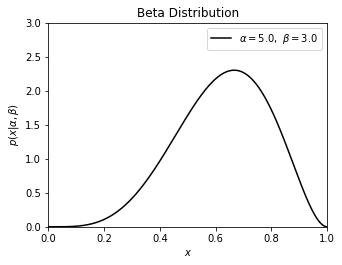

In [112]:
horiz_data = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(figsize=(5, 3.75))
a=5
b=3
dist = beta(a, b)
plt.plot(horiz_data, dist.pdf(horiz_data), ls="-", c='black',label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')

plt.legend(loc=0)
plt.show()

# a. Uniform Sampling
1. Find the maximum value of $beta(α=5.0,β=3.)$, denoted $beta_{max}$.

In [113]:
#Find the maximum of the beta function.
beta_max = np.max(dist.pdf(horiz_data))
print("beta_max: ", beta_max)

beta_max:  2.304526748971191


2-5. Generate a uniform distribution sample x between [0, 1] and another uniform distribution y between [0, $beta_{max}$]. Then for each $x_i$, compute the event weight $w(x_i)$ and only keep $x_i$ when $w(x_i) \geq y$.

In this case, our weight function $w(x)$ is given by $w(x)=\frac{f(x)}{g(x)}$ with $f(x) = beta(x)$ and $g(x) =$ our uniform distribution from 0 to 1.

1000


Text(0.5, 0, 'x')

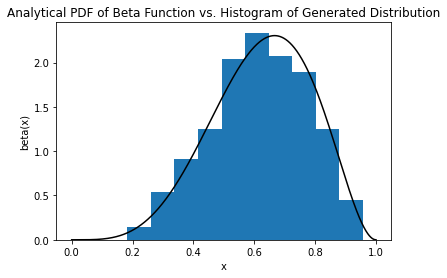

In [114]:
#Generate 4000 xs and ys to ensure we have enough data to select from, then keep N=1000 of our data points at the end.
n = 6000

x = uniform.rvs(size=n)
y = uniform.rvs(scale=beta_max, size=n)
w = dist.pdf(x)
x_accepted = x[w >= y]
x_kept = x_accepted[:1000]
print(len(x_kept))

#Compare the histogram of the beta distribution that we generated to the analytical pdf of our beta distribution. They should look
#approximately the same.
plt.hist(x_kept, bins=10, density=True)
plt.plot(horiz_data, dist.pdf(horiz_data), ls="-", c='black',label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))
plt.title("Analytical PDF of Beta Function vs. Histogram of Generated Distribution")
plt.ylabel("beta(x)")
plt.xlabel("x")

Q1: What is the event weight formula?

The event weight formula in this case is $w(x)=\frac{f(x)}{c g(x)} = \frac{beta(x)}{beta_{max}}$

Q2: What is the total number of samplings (pairs of x, y) required for this MC simulation?

I progressively incremented the amount of sampling points until 1000 points were accepted. Approximately 4000 data points were required to consistently be able to keep 1000 data points that satisfy $w(x_i) \geq y$.

# b. Gaussian Sampling
Here, we repeat steps above but using a Gaussian distribution sample for $y$ while still using a uniform distribution for $x$. Our choice of shape parameters for $y$ is arbitrary - the result will converge to the beta distribution regardless, so we simply use the standard normal distribution ($\mu = 0, \sigma = 1$) for $y$.

1000


Text(0.5, 0, 'x')

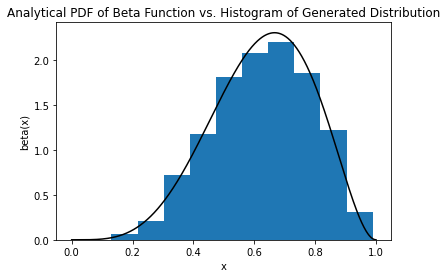

In [115]:

#Generate 4000 xs and ys to ensure we have enough data to select from, then keep N=1000 of our data points at the end.
x = uniform.rvs(size=3500)
y = np.abs(norm.rvs(size=3500))
# TODO Should beta_max be here or not (see c discussion from end of lab)?
w = dist.pdf(x) / (beta_max)
x_accepted = x[w >= y]
x_kept = x_accepted[:1000]
print(len(x_kept))

#Compare the histogram of the beta distribution that we generated to the analytical pdf of our beta distribution. They should look
#approximately the same.
plt.hist(x_kept, bins=10, density=True)
plt.plot(horiz_data, dist.pdf(horiz_data), ls="-", c='black',label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))
plt.title("Analytical PDF of Beta Function vs. Histogram of Generated Distribution")
plt.ylabel("beta(x)")
plt.xlabel("x")

$\textbf{Q1}$: What is your choice of Gaussian distribtuion parameter for the importance sample?

We can use any parameters for our normal distribution (we just happened to use a standard normal distribution with $\mu = 0, \sigma = 1$.), We then take the absolute value to ensure all values in the distribution are positive.

$\textbf{Q2}$: What is the event weight formula?

The event weight formula is still given by $w(x)=\frac{f(x)}{c g(x)} = \frac{beta(x)}{beta_{max}}$, but our rejection criteria becomes $w(x_i) \geq y$, where the $y$ values are now given the the normal distribution we chose.

$\textbf{Q3}$: What is the total number of sampling (pairs of x, y) required for this MC simulation? How is this compared with the uniform sampling?

This time, only ~3500 (x,y) sample pairs were required to accept 1000 data points. This is less than the ~6000 data points required for the uniform distribution.

### Visualization

# Sphere in 3d
### a. Uniform density

1. Generate an array of N random numbers for the x, y, and z coordinates. Make sure that all points lie in a cube enclosing the sphere.

Each of the lists xs, ys, and zs contain 100 points randomly generated in the interval (-1,1).

In [116]:
N = 100
xs = uniform.rvs(loc=-1, scale=2, size=N)
ys = uniform.rvs(loc=-1, scale=2, size=N)
zs = uniform.rvs(loc=-1, scale=2, size=N)

2. Generate an index function. This is an array that is equal to 1 for points inside the sphere and 0 outside the sphere. 

Here, we just use the distance function, $d = \sqrt{x^2+y^2+z^2}$, to determine whether points $(x,y,z)$ are inside the sphere. They will be assigned 1 if $d < 1$ and 0 if $d > 1$.

In [117]:
index_fun = (np.sqrt(xs**2 + ys**2 + zs**2) < 1)

3. Calculate the mass and uncertainty of mass by applying the Monte Carlo integration method. 

The volume of the sphere can be calculated by $V_{sphere} = \frac{V}{N} \sum_{i=1}^N f(x,y,z)$, where $V = 2^3 = 8 m^3$ is the volume of the cube, $N = 100$ is the number of data points generated, and $f(x,y,z)$ is our index function. We can then calculate the approximate mass of the sphere by taking $m = 2 \frac{kg}{m^3} (V_{sphere})$.

The uncertainty is given by the formula $\sigma[\hat{I}] \approx \frac{V_{cube}}{\sqrt{N}} \sigma[f]$, which we calculate and display below.

In [118]:
rho_0 = 2
v_sphere = 2**3 / N * np.sum(index_fun)
mass_approx = rho_0*v_sphere
unc_mass = 2**3 / np.sqrt(N)
mass_exact = 8 / 3 * np.pi
print("MC approximation of mass of sphere with N=100: ", mass_approx, "+/-", unc_mass)
print("Exact Mass: ", mass_exact)

MC approximation of mass of sphere with N=100:  8.16 +/- 0.8
Exact Mass:  8.377580409572781


Now, let us do the same procedure, but changing $N$ from 100 to 100,000 with 100 steps, then plotting the resulting distribution.

In [119]:
def find_mass(N):
    xs_steps = uniform.rvs(loc=-1, scale=2, size=N)
    ys_steps = uniform.rvs(loc=-1, scale=2, size=N)
    zs_steps = uniform.rvs(loc=-1, scale=2, size=N)

    index_fun = (np.sqrt(xs_steps**2 + ys_steps**2 + zs_steps**2) < 1)

    v_sphere = 8 / N * np.sum(index_fun)
    mass = rho_0*v_sphere
    unc_mass = 2**3 / np.sqrt(N)        

    return mass, unc_mass

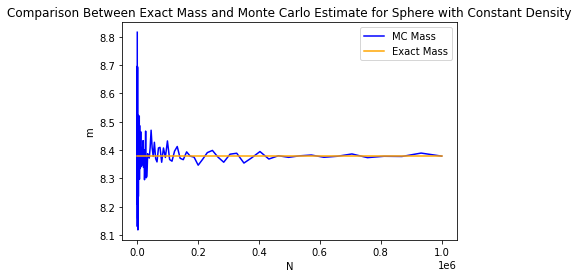

Mass MC approximation when N = 100k:  8.378544 +/- 0.008
Exact mass:  8.377580409572781


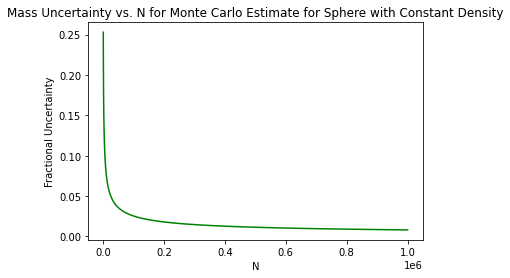

In [128]:
# Calculate and plot MC uncertainty and discuss convergence of integration.
# (See pg. 35 of Lec 07 Monte Carlo simulation.pptx for formula)
Ns = np.logspace(3,6,100)

masses, unc_masses = list(zip(*[find_mass(int(N)) for N in Ns]))
#MC convergence.
plt.plot(Ns, masses, label="MC Mass", color="blue");
#Line showing exact value of mass.
plt.plot(Ns, mass_exact * np.ones(100), label="Exact Mass", color="orange");
plt.legend()
plt.title("Comparison Between Exact Mass and Monte Carlo Estimate for Sphere with Constant Density")
plt.xlabel("N")
plt.ylabel("m")
plt.show()

#Plot the uncertainty of mass vs. N.
plt.plot(Ns, unc_masses, label="Uncertainty of Mass", color="green");
plt.title("Mass Uncertainty vs. N for Monte Carlo Estimate for Sphere with Constant Density")
plt.xlabel("N")
plt.ylabel("Fractional Uncertainty")

print("Mass MC approximation when N = 100k: ", masses[-1], "+/-", unc_masses[-1])
print("Exact mass: ", mass_exact)

Based on the plot above, the Monte Carlo estimate of the mass indeed appears to converge to the exact mass value of $~8.378$, which is within the range defined by $8.379 \pm 0.008$.

### b. Linear density

Consider a density that is a linear function of the radius according to $\rho(r)=\rho_0 r$.

Calculate the mass of the sphere for the case of the linear increasing density using the methodology developed in previous exercise. What is the sampling N which is large enough that the uncertainty is less than $1\%$?

We can find the volume of the sphere in the same way as we did before, but now we have to numerically integrate the point masses, summing them by taking $m = \sum \rho(r) dV $

In [121]:
def find_mass_lin(N):
    xs_steps = uniform.rvs(loc=-1, scale=2, size=N)
    ys_steps = uniform.rvs(loc=-1, scale=2, size=N)
    zs_steps = uniform.rvs(loc=-1, scale=2, size=N)

    #Keep track of the distance r of the current point from the origin and define our index function. Index function will be 0 if point is in the sphere and 1 if not. We only add mass
    #increments whose corresponding index in the index function has a value of 1, ignoring those of value 0.
    r = np.sqrt(xs_steps**2 + ys_steps**2 + zs_steps**2)
    index_fun = (r < 1)
    #Volume element is the volume of the cube (2^3 = 8) divided by the number of data points N.
    dv = (1-(-1))**3 / N

    #Find the total mass by numerically integrating the masses coming from each point inside the sphere.
    mass = 0
    for i in range(len(xs_steps)):
        #Do our check for in/out of the sphere.
        if index_fun[i] != 0:
            #Density defined by our function rho(r) = rho_0 * r.
            rho = rho_0*r[i]
            mass += rho*dv
            unc_mass = 2**3 / np.sqrt(N)

    return mass, unc_mass

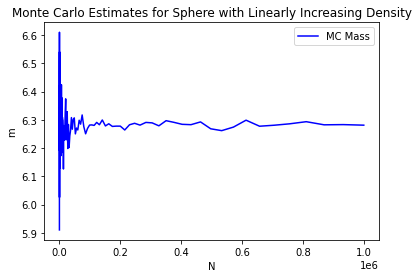

Text(0, 0.5, 'Fractional Uncertainty')

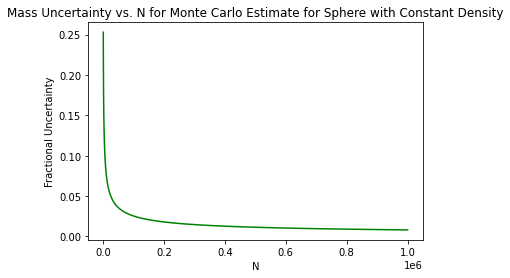

In [122]:
masses_lin, unc_masses_lin = list(zip(*[find_mass_lin(int(N)) for N in Ns]))
#MC convergence.
plt.plot(Ns, masses_lin, label="MC Mass", color="blue");
plt.legend()
plt.title("Monte Carlo Estimates for Sphere with Linearly Increasing Density")
plt.xlabel("N")
plt.ylabel("m")
plt.show()

#Plot the uncertainty of mass vs. N.
plt.plot(Ns, unc_masses_lin, label="Uncertainty of Mass", color="green");
plt.title("Mass Uncertainty vs. N for Monte Carlo Estimate for Sphere with Constant Density")
plt.xlabel("N")
plt.ylabel("Fractional Uncertainty")

In [123]:
#Find the point where 1% uncertainty is, then display that MC estimate of the mass and its corresponding uncertainty.
N_one_perc_lin = next(i for i, unc in enumerate(unc_masses_lin) if unc < 0.01)
print("First mass MC approximation with < 1 percent uncertainty (found when N =", N_one_perc_lin, "):", masses_lin[N_one_perc_lin], "+/-", unc_masses_lin[N_one_perc_lin])

First mass MC approximation with < 1 percent uncertainty (found when N = 93 ): 6.277269259698904 +/- 0.00986277559940602


Thus, our estimate for the mass of the sphere with linearly increasing density is $6.277 \pm 0.010$ kg.

# Bonus

Consider a density that is an unit exponential function of the radius according to $\rho(r)=\frac{1}{\rho_0}e^{−\rho_0 r}$.

We apply the same procedure as above by defining a new method for calculating the mass, this time based on the exponential density distribution given here.

In [124]:
def find_mass_exp(N):
    xs_steps = uniform.rvs(loc=-1, scale=2, size=N)
    ys_steps = uniform.rvs(loc=-1, scale=2, size=N)
    zs_steps = uniform.rvs(loc=-1, scale=2, size=N)

    #Keep track of the distance r of the current point from the origin and define our index function. Index function will be 0 if point is in the sphere and 1 if not. We only add mass
    #increments whose corresponding index in the index function has a value of 1, ignoring those of value 0.
    r = np.sqrt(xs_steps**2 + ys_steps**2 + zs_steps**2)
    index_fun = (r < 1)
    #Volume element is the volume of the cube (2^3 = 8) divided by the number of data points N.
    dv = (1-(-1))**3 / N

    #Find the total mass by numerically integrating the masses coming from each point inside the sphere.
    mass = 0
    for i in range(len(xs_steps)):
        #Do our check for in/out of the sphere.
        if index_fun[i] != 0:
            #Density defined by our function rho(r) = rho_0 * r.
            rho = rho = (1/rho_0) * np.exp(-rho_0 * r[i])
            mass += rho*dv
            unc_mass = 2**3 / np.sqrt(N)

    return mass, unc_mass

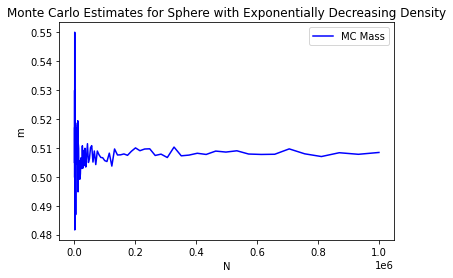

Text(0, 0.5, 'Fractional Uncertainty')

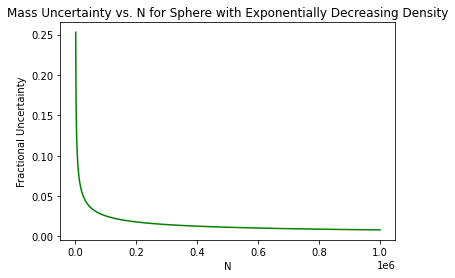

In [125]:
masses_exp, unc_masses_exp = list(zip(*[find_mass_exp(int(N)) for N in Ns]))
#MC convergence.
plt.plot(Ns, masses_exp, label="MC Mass", color="blue");
plt.legend()
plt.title("Monte Carlo Estimates for Sphere with Exponentially Decreasing Density")
plt.xlabel("N")
plt.ylabel("m")
plt.show()

#Plot the uncertainty of mass vs. N.
plt.plot(Ns, unc_masses_lin, label="Uncertainty of Mass", color="green");
plt.title("Mass Uncertainty vs. N for Sphere with Exponentially Decreasing Density")
plt.xlabel("N")
plt.ylabel("Fractional Uncertainty")

In [126]:
#Find the point where 1% uncertainty is, then display that MC estimate of the mass and its corresponding uncertainty.
N_one_perc_exp = next(i for i, unc in enumerate(unc_masses_exp) if unc < 0.01)
print("First mass MC approximation with < 1 percent uncertainty (found when N =", N_one_perc_exp, "):", masses_exp[N_one_perc_exp], "+/-", unc_masses_exp[N_one_perc_exp])

First mass MC approximation with < 1 percent uncertainty (found when N = 93 ): 0.5078087803077463 +/- 0.00986277559940602


Thus, our estimate for the mass of the sphere with exponentially decreasing density is $0.508 \pm 0.010$ kg.